In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 静态数据集分析

In [3]:
# 预处理后的静态数据集
repositories_label = pd.read_csv('../data/repositories_label.csv')

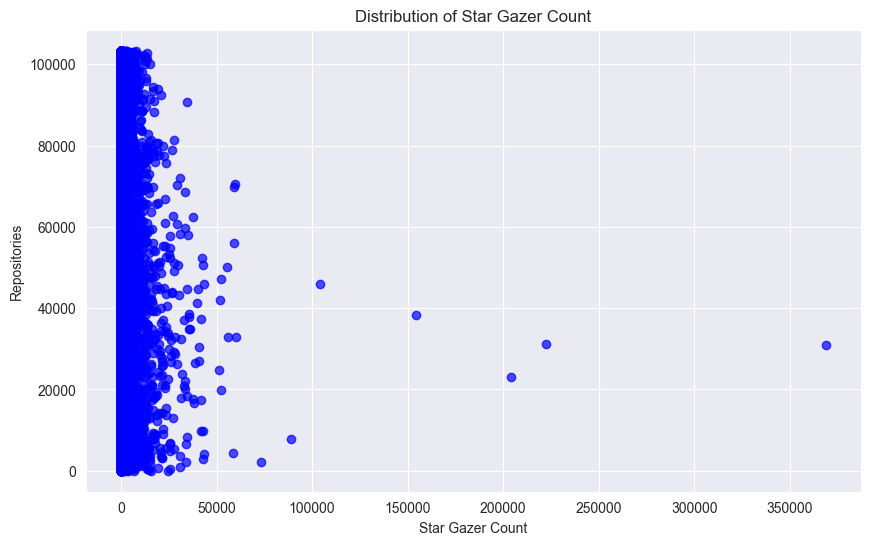

In [3]:
# 绘制散点图
plt.figure(figsize=(10, 6))
plt.scatter(repositories_label['stargazerCount'], range(len(repositories_label)), alpha=0.7, color='blue')

# 设置标题和坐标轴标签
plt.title('Distribution of Star Gazer Count')
plt.xlabel('Star Gazer Count')
plt.ylabel('Repositories')
plt.grid(True)

plt.show()

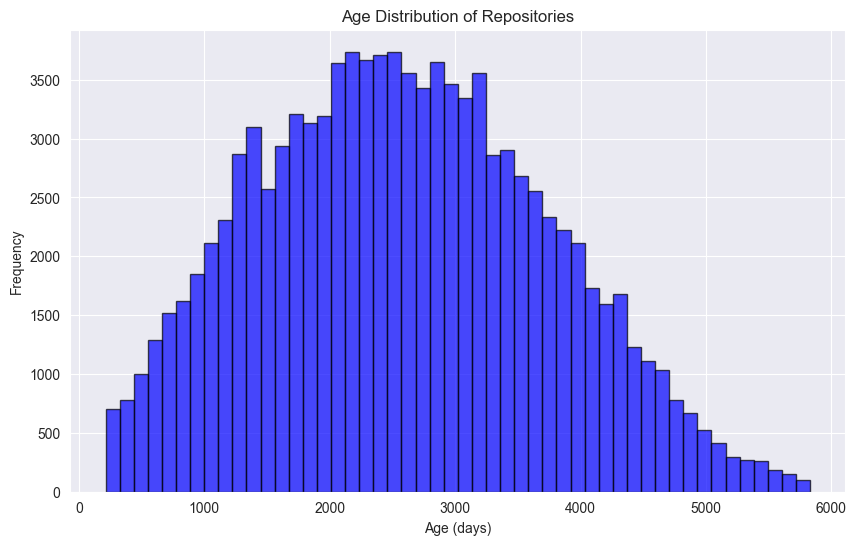

In [5]:
# 绘制年龄直方图
plt.figure(figsize=(10, 6))
plt.hist(repositories_label['age'], bins=50, color='blue', alpha=0.7, edgecolor='black')

plt.title('Age Distribution of Repositories')
plt.xlabel('Age (days)')
plt.ylabel('Frequency')

plt.show()

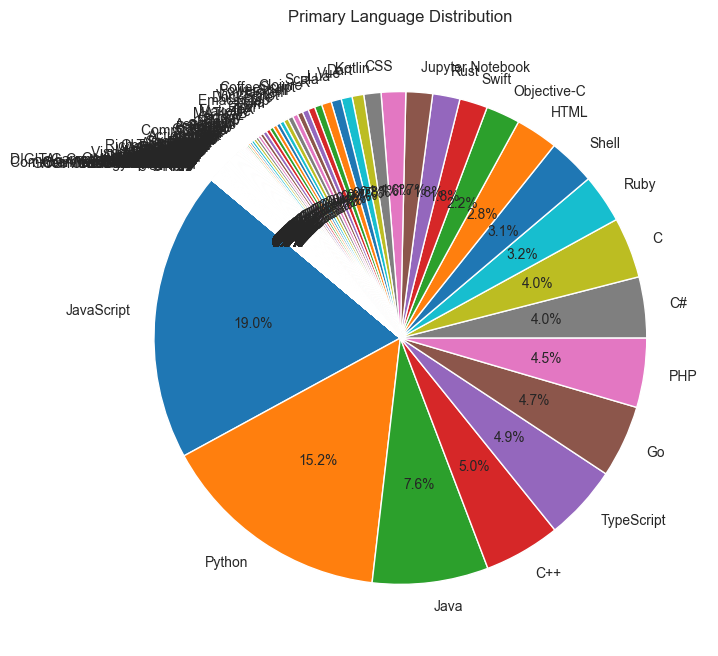

In [9]:
# 编程语言饼状图
language_count = repositories_label['primaryLanguage'].value_counts()
plt.figure(figsize=(10, 8))
plt.pie(language_count, labels=language_count.index, autopct='%1.1f%%', startangle=140)
plt.title('Primary Language Distribution')
plt.show()

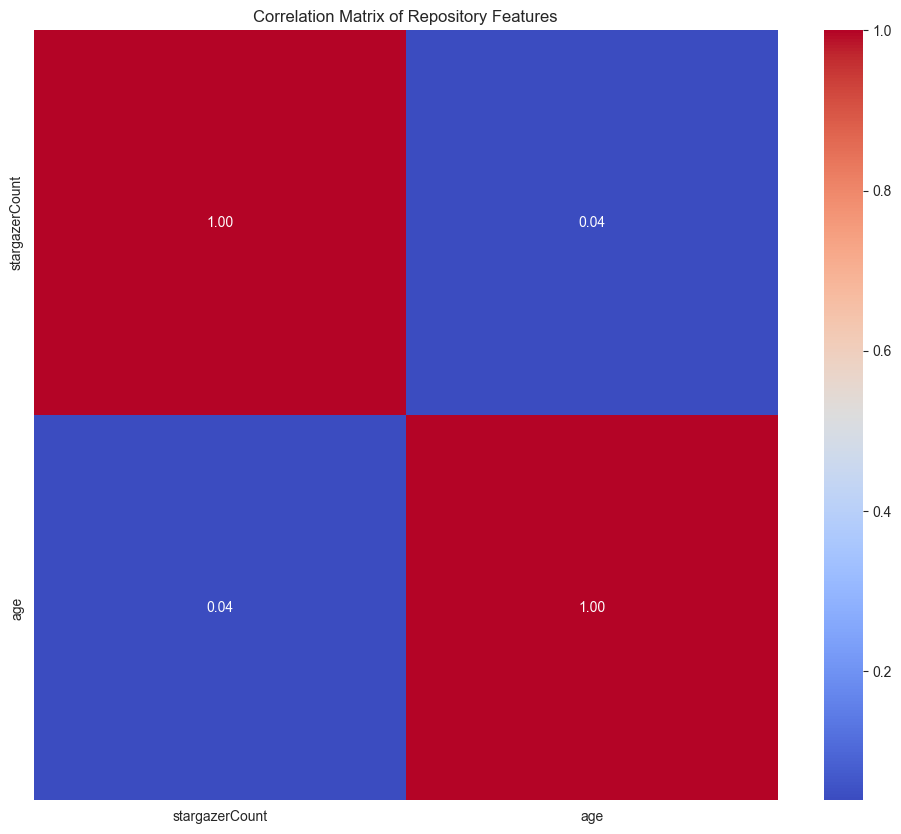

In [48]:
# 选择只有数值类型的列  
numeric_cols = repositories_label.select_dtypes(include=['int64', 'float64']).columns  

# 计算相关性矩阵  
correlation_matrix = repositories_label[numeric_cols].corr(method='pearson')  

# 可视化相关性矩阵
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Repository Features')
plt.show()

# 动态数据集分析

In [50]:
# 预处理后的动态数据集
repositories_statistics = pd.read_csv('../data/repositories_statistics.csv')

repositories_statistics.hist(figsize=(12, 12))

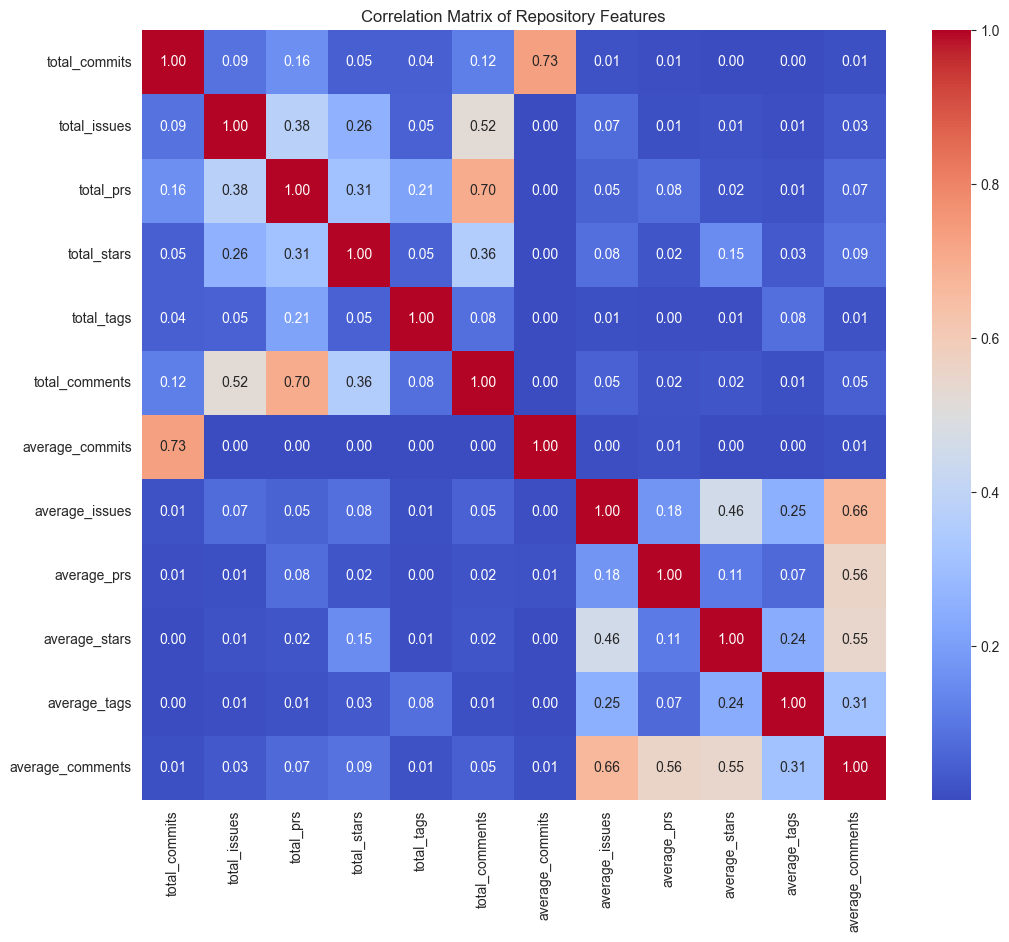

In [53]:
# 选择只有数值类型的列  
numeric_cols = repositories_statistics.select_dtypes(include=['int64', 'float64']).columns  

# 计算相关性矩阵  
correlation_matrix = repositories_statistics[numeric_cols].corr(method='pearson')  

# 可视化相关性矩阵
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Repository Features')
plt.show()

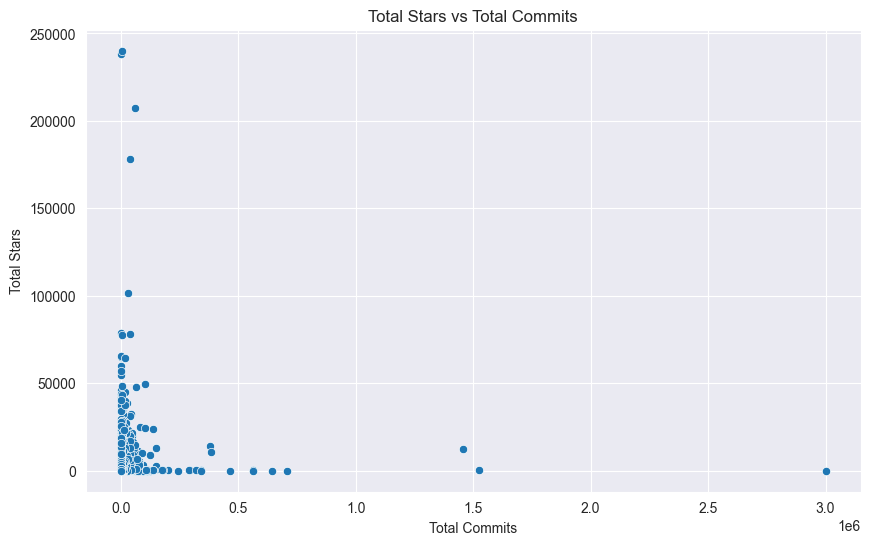

In [60]:
# 总星星数与总提交数的散点图
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_commits', y='total_stars', data=repositories_statistics)
plt.title('Total Stars vs Total Commits')
plt.xlabel('Total Commits')
plt.ylabel('Total Stars')
plt.show()

# 数据降维

## PCA

In [28]:
merged_data = pd.read_csv('../data/repositories_merged.csv')

from sklearn.preprocessing import StandardScaler  
X = merged_data.select_dtypes(include=['int64', 'float64']) 
# 标准化
X_scaled = StandardScaler().fit_transform(X)  
print(X_scaled.shape)

(96487, 15)


Explained variance ratio: [0.31447625 0.13796341 0.13214595 0.12454088 0.11966692 0.08025509
 0.03571237 0.02596259]
Cumulative explained variance: [0.31447625 0.45243966 0.58458561 0.70912649 0.82879341 0.90904849
 0.94476087 0.97072345]


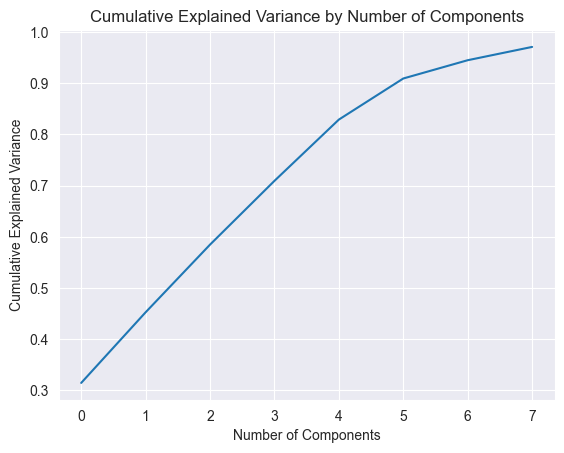

In [29]:
import numpy as np  
from sklearn.decomposition import PCA  
 
pca = PCA(n_components=8)   
pca.fit_transform(X_scaled)  
explained_variance_ratio = pca.explained_variance_ratio_  
print("Explained variance ratio:", explained_variance_ratio)  
print("Cumulative explained variance:", np.cumsum(explained_variance_ratio))

# 绘制累积贡献率
plt.plot(np.cumsum(explained_variance_ratio))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Number of Components')
plt.show()


In [30]:
X_inverse = pca.inverse_transform(pca.transform(X))  
reconstruction_error = np.mean((X - X_inverse) ** 2)  
print("Reconstruction Error:", reconstruction_error)  

Reconstruction Error: 6174843.61140967


D:\Anaconda 3\envs\lacpytorch\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


In [31]:
# Varimax 旋转
from factor_analyzer import Rotator  
# 获取 PCA 的成分矩阵  
components = pca.components_ 
# 初始化旋转器  
rotator = Rotator(method='varimax')  

X_rotated = rotator.fit_transform(components.T).T  

# 解释旋转后的主成分  
print("旋转后的主成分加载矩阵：")  
print(pd.DataFrame(X_rotated, columns=merged_data.select_dtypes(include=['int64', 'float64']).columns))  

旋转后的主成分加载矩阵：
   stargazerCount  total_lifetime  active_lifetime  total_commits  \
0        0.026900       -0.000623         0.002379       0.015724   
1       -0.736742        0.004902        -0.002413      -0.007975   
2       -0.005501        0.707006         0.706745       0.003170   
3        0.003762        0.000856        -0.000609      -0.003589   
4        0.001487       -0.000096         0.000319       0.703644   
5       -0.004260       -0.000501         0.000563       0.002309   
6       -0.034432        0.000048        -0.001638       0.010768   
7       -0.062856        0.001286         0.001498      -0.015694   

   total_issues  total_prs  total_stars  total_tags  total_comments  \
0     -0.013814   0.647505    -0.010970    0.010633       -0.043135   
1     -0.060050  -0.087995    -0.648932   -0.039653       -0.064503   
2      0.006106   0.011998     0.002499    0.010210        0.002405   
3     -0.001015  -0.011795    -0.001808   -0.707013       -0.003528   
4     -0.0

删除一些无关特征 依据：多重共线性：如果两个或多个特征在多个主成分上具有相似的载荷模式，这可能表明它们之间存在高度相关性，可以考虑删除其中一个。

In [32]:
merged_data = merged_data.drop(columns=['total_lifetime'])
merged_data = merged_data.drop(columns=['total_stars'])
merged_data = merged_data.drop(columns=['total_comments'])
merged_data = merged_data.drop(columns=['total_issues'])
merged_data = merged_data.drop(columns=['total_commits'])
merged_data.head

<bound method NDFrame.head of                               nameWithOwner  stargazerCount  isArchived  \
0             goincrypto/cryptocom-exchange              63       False   
1           shaofengzeng/SuperPoint-Pytorch             105       False   
2              HAOLI-TUKL/Multi_Robots_DMPC              50       False   
3      graphql-compose/graphql-compose-json              64       False   
4            mcuadros/go-rpi-rgb-led-matrix              75       False   
...                                     ...             ...         ...   
96482             zzVertigo/XboxLive.Server              43        True   
96483                          zzjoey/Leava              97        True   
96484            zzswang/docker-nginx-react              58        True   
96485                      zzurio/Anti-Dump              50        True   
96486     zzurio/HWID-Authentication-System              43        True   

      primaryLanguage  active_lifetime  total_prs  total_tags  \
0   

再次进行PCA操作

In [33]:
from sklearn.preprocessing import StandardScaler  
X = merged_data.select_dtypes(include=['int64', 'float64']) 
# 标准化
X_scaled = StandardScaler().fit_transform(X)  
print(X_scaled.shape)

(96487, 10)


Explained variance ratio: [0.32787146 0.18106989 0.13076148 0.10192368 0.09764561 0.07671168
 0.0332846  0.02842732]
Cumulative explained variance: [0.32787146 0.50894135 0.63970283 0.74162651 0.83927212 0.9159838
 0.9492684  0.97769571]


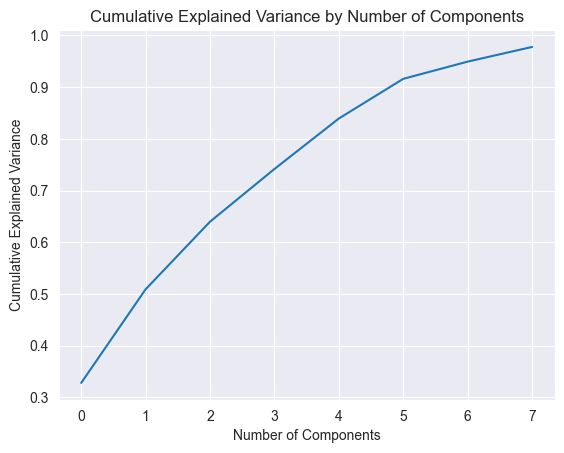

In [35]:

pca = PCA(n_components=8)   
pca.fit_transform(X_scaled)  
explained_variance_ratio = pca.explained_variance_ratio_  
print("Explained variance ratio:", explained_variance_ratio)  
print("Cumulative explained variance:", np.cumsum(explained_variance_ratio))

# 绘制累积贡献率
plt.plot(np.cumsum(explained_variance_ratio))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Number of Components')
plt.show()